In [1]:
!pip install pyvaporation==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 115.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 187.9 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 2.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 548.1 kB/s eta 0:00:0000:0100:06
  Created wheel for attr: filename=attr-0.3.1-py3-none-any.whl size=2458 sha256=13f2f3fdcf0ab71c18b0104a654d695c54d9aaa45e8c6e8ae5d2a91322e74e6a
  Stored in directory: /Users/a.chekmachev/Library/Caches/pip/wheels/47/53/81/061bfd275ab8eb923cfe874f1f6cbe1e607092df09d606c982
  Created wheel for pandas: filename=pandas-1.3.5-cp38-cp38-macosx_11_0_arm64.whl size=10097803 sha256=e9cc10aa3933338e68acefd8e2578bc64861b9c23f6fb158275acb7994541130
  Stored in director

In [2]:
!pip install matplotlib==3.2.2

     ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 21.2/40.3 MB 1.8 MB/s eta 0:00:11^C
     ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 21.2/40.3 MB 1.8 MB/s eta 0:00:11
ERROR: Operation cancelled by user


# PyVaporation Code Examples

## Main classes and methods overview

* Component
  - Create
  - Methods overview
* Mixture creation
  - Create
  - Methods overview
* Permeance
  - Create
  - Convert
* Membrane
  - Create/Load
  - Methods overview
* Pervaporation Function
  - Create / (best) Fit
  - Plot
* Pervaporation (ideal)
  - Create
  - Model ideal diffusion curve
  - Plot diffusion curve
* Pervaporation (non-ideal)
  - Create
  - Model non-ideal diffusion curve
  - Plot diffusion curve
* Pervaporation (non-ideal)
  - Modelling non-idael diffusion curves with different initial permeances
* Process Model
  - Create
  - Conditions
  - Ideal isothermal process

## Examples of applied usage

* Illustration of the influence of the precision value on the obtained flux values
  - Calculate partial fluxes
* Fitting of a strongly non-ideal diffusion curve with `find_best_fit()`
* Evaluation of a non-ideal isothermal process model against experimental data provided in the literature
* Evaluation of a non-ideal isothermal process model against obtained experimental data
*Evaluation of a non-ideal non-isothermal process model against experimental data provided in the literature

In [22]:
import pyvaporation

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib notebook

In [4]:
# Example 1. Creation of the Component object, 
# calculation of some of the components’ properties

from pyvaporation import Components, Component
from pyvaporation import VaporPressureConstants, HeatCapacityConstants

methanol = Components.MeOH

mtbe = Component(
    name="MTBE",
    molecular_weight=88.15,
    vapour_pressure_constants=VaporPressureConstants(
        a=6.050931522,
        b=-1139.816725,
        c=-46.15171,
    ),
    heat_capacity_constants=HeatCapacityConstants(
        a=147.329712,
        b=-9.7850807e-2,
        c=9.216480e-4,
        d=-4.75200e-7,
    ),
)

print(
    'Methanol vapor pressure:', 
    methanol.get_vapor_pressure(323.15), 
    'kPa'
)

print(
    'MTBE vapor pressure:', 
    mtbe.get_vapor_pressure(323.15), 
    'kPa'
)

print(
    'Methanol specific heat capacity:', 
    methanol.get_specific_heat(323.15), 
    'J/(mol*K)'
)

print(
    'MTBE specific heat capacity:', 
    mtbe.get_specific_heat(323.15), 
    'J/(mol*K)'
)

Methanol vapor pressure: 55.57396777330733 kPa
MTBE vapor pressure: 86.30665730589656 kPa
Methanol specific heat capacity: 86.65695527172431 J/(mol*K)
MTBE specific heat capacity: 195.91742978431822 J/(mol*K)


In [5]:
# Example 2. Creation of a Mixture object, 
# calculation of saturated vapour pressure of the components 
# at 333.15 oK in a stated composition range


from pyvaporation import (
    Mixtures, Composition, 
    CompositionType, 
    get_nrtl_partial_pressures
)

h2o_etoh = Mixtures.H2O_EtOH

composition_range = [
   Composition(p=i / 10, type=CompositionType.weight) for i in range(11)
]

print('Saturated vapour pressures of (water, ethanol) in kPa at 333.15 K')
for composition in composition_range:
    print(
       get_nrtl_partial_pressures(
           temperature=333.15,
           mixture=h2o_etoh,
           composition=composition
       )
    )

Saturated vapour pressures of (water, ethanol) in kPa at 333.15 K
(0.0, 46.89836939159766)
(8.891134632430656, 37.466800075630296)
(13.245231502587709, 31.66032683488933)
(15.397007508848512, 27.95931933290596)
(16.511008564375675, 25.442571233550673)
(17.1642007104559, 23.47758805609483)
(17.64548411500568, 21.53220662174932)
(18.101979793349827, 19.046502948023534)
(18.610193493757325, 15.324493735775249)
(19.211072426116353, 9.420253102872836)
(19.92758517292072, 0.0)


In [6]:
# Example 3. Creation of a Permeance object, conversion between permeance units

from pyvaporation import Permeance, Units

permeance = Permeance(value=3568, units=Units.GPU)
permeance.convert(to_units=Units.kg_m2_h_kPa, component=Components.H2O)

Permeance(value=0.07754020415999999, units='kg/(m2*h*kPa)')

In [8]:
# Example 4. Loading of a Membrane object from a directory,
# calculation of some parameters based on an IdealExperiments object loaded

from pyvaporation import Membrane, Components

romakon_pm_102 = Membrane.load("tests/default_membranes/RomakonPM_102")

h2o = Components.H2O
etoh = Components.EtOH

romakon_pm_102.calculate_activation_energy(component=h2o)

romakon_pm_102.calculate_activation_energy(component=etoh)

print(
    'Romakon PM 102 H2O permeance at 323.15 K is',
    romakon_pm_102.get_permeance(
        temperature=323.15,
        component=Components.H2O
    )
)


print(
    'Romakon PM 102 ideal selectivity H2O/EtOH at 333.15 K is',
    romakon_pm_102.get_ideal_selectivity(
          temperature=333.15,
          first_component=h2o,
          second_component=etoh
    )
)


print(
    'Romakon PM 102 H2O pure component flux at 313.15 K is',
    romakon_pm_102.get_estimated_pure_component_flux(
          temperature=313.15,
          component=h2o,
          permeate_pressure=1
    )
)

Romakon PM 102 H2O permeance at 323.15 K is Permeance(value=0.067127, units='kg/(m2*h*kPa)')
Romakon PM 102 ideal selectivity H2O/EtOH at 333.15 K is 889.7388722741106
Romakon PM 102 H2O pure component flux at 313.15 K is 0.35079725864427985


H2O permeance at 333.15 K 0.05343349152297439 kg/(m2*h*kPa)


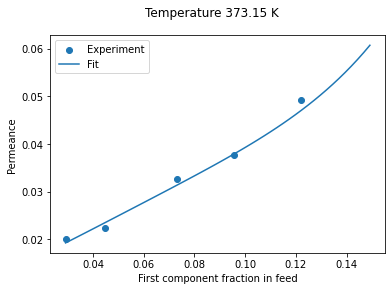

In [27]:
# Example 5. Creation, calling and plotting of a PervaporationFunction object

from pyvaporation import Membrane, Measurements, find_best_fit


pervap_2510 = Membrane.load('tests/default_membranes/Pervap_2510')

curve_set = pervap_2510.diffusion_curve_sets[0]

data_h2o = Measurements.from_diffusion_curves_first(curve_set)
data_ipoh = Measurements.from_diffusion_curves_second(curve_set)

fit_h2o = find_best_fit(data_h2o)
fit_ipoh = find_best_fit(data_ipoh)

print('H2O permeance at 333.15 K', fit_h2o(0.15, 333.15), 'kg/(m2*h*kPa)')

fit_h2o.plot(experimental_data=data_h2o, temperature=373.15)

<IPython.core.display.Javascript object>


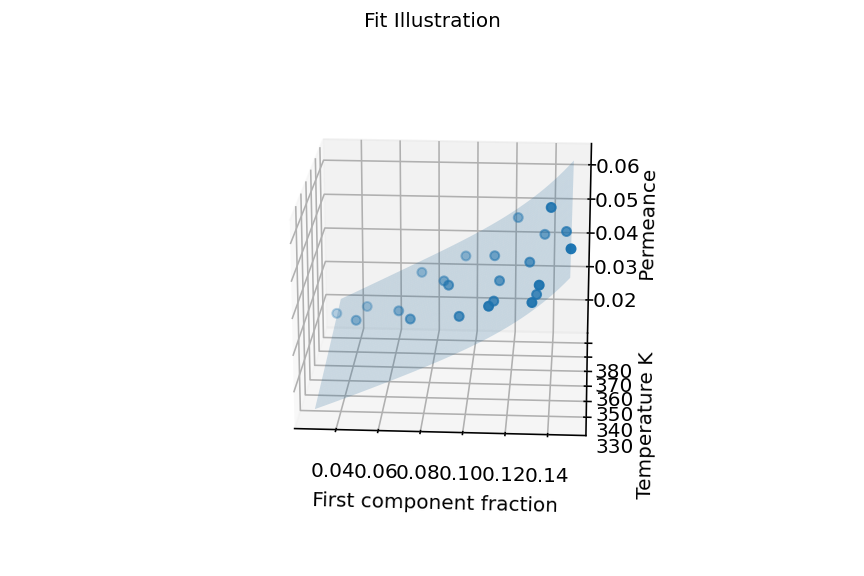

<IPython.core.display.Javascript object>


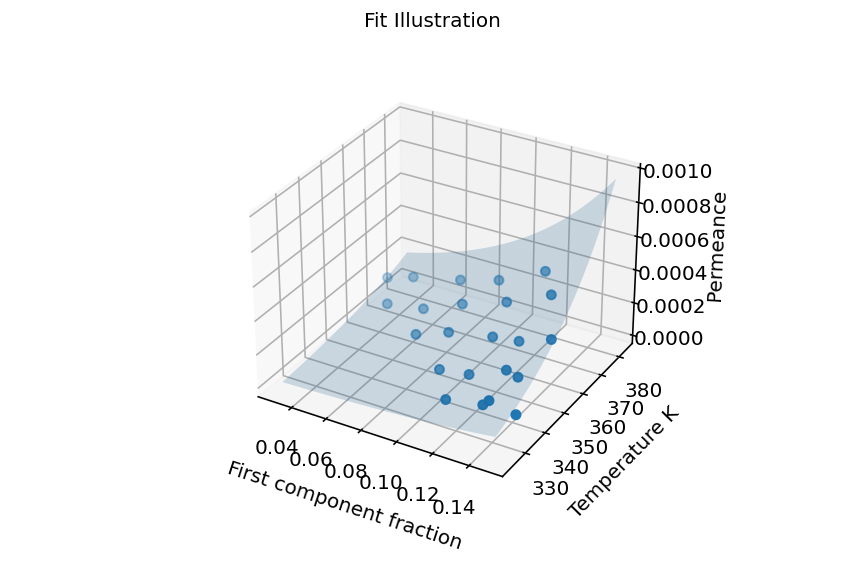

In [28]:
%matplotlib notebook
fit_h2o.plot(experimental_data=data_h2o)
fit_ipoh.plot(experimental_data=data_ipoh)

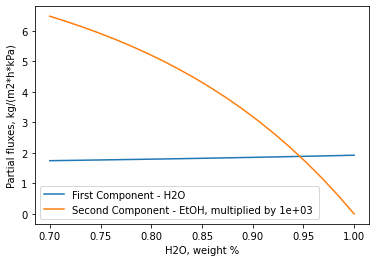

In [29]:
# Example 6. Creation of a Pervaporation object and 
# modelling an ideal diffusion curve 
# (permeance is assumed independent of feed composition) of 
# Romakon PM 102 membranes at 335.15 K; 
# plotting of partial fluxes and separation factor 
# as functions of water weight fraction in the feed

%matplotlib inline

from pyvaporation import (
    Membrane, 
    Pervaporation,
    Mixtures, 
    Composition,
    CompositionType,
)

romakon_pm_102 = Membrane.load("tests/default_membranes/RomakonPM_102")

h2o_etoh = Mixtures.H2O_EtOH
composition_range = [
    Composition(p=c,type=CompositionType.weight)
    for c in np.linspace(0.7, 1, 20)
]

pervaporation = Pervaporation(membrane=romakon_pm_102, mixture=h2o_etoh)

curve = pervaporation.ideal_diffusion_curve(
   feed_temperature=335.15,
   compositions=composition_range,
   permeate_temperature=263.15
)

curve.plot(curve.partial_fluxes,'Partial fluxes, kg/(m2*h*kPa)')

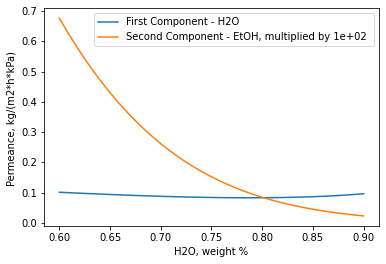

In [30]:
# Example 7. Creation of a Pervaporation object and modelling 
# an non-ideal diffusion curve 
# (permeance are assumed dependent on feed composition) of 
# Romakon PM 102 membranes at 335.15 K

from pyvaporation import (
    Membrane, 
    Pervaporation,
    Mixtures, 
    Composition,
    CompositionType,
)

romakon_pm_102 = Membrane.load("tests/default_membranes/RomakonPM_102")

h2o_etoh = Mixtures.H2O_EtOH
curve_set = romakon_pm_102.diffusion_curve_sets[0]

pervaporation = Pervaporation(membrane=romakon_pm_102, mixture=h2o_etoh)

initial_feed = Composition(p=0.9, type=CompositionType.weight)

curve = pervaporation.non_ideal_diffusion_curve(
   feed_temperature=335.15,
   diffusion_curve_set=curve_set,
   initial_feed_composition=initial_feed,
   delta_composition= -0.01,
   number_of_steps= 30,
   n_first=5,
)

curve.plot(curve.permeances, 'Permeance, kg/(m2*h*kPa) ')

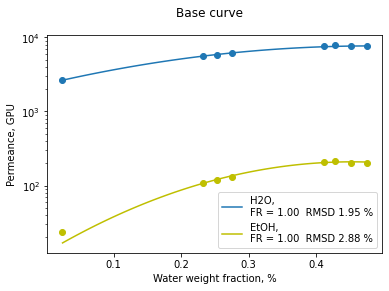

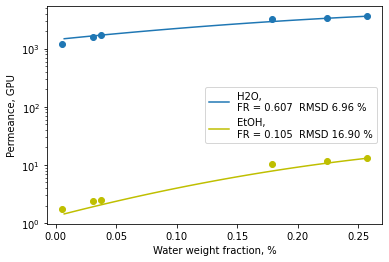

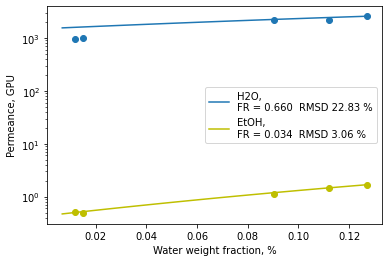

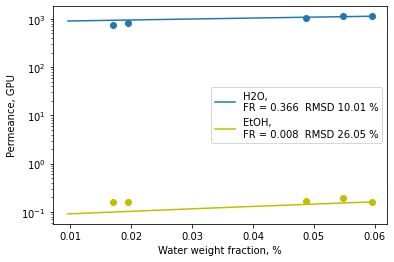

In [32]:
# Example 8. Loading of a Membrane object; 
# modelling non-ideal diffusion curves using 
# various “dry” initial permeance values of 
# Pervap 4100 membrane

from pyvaporation import (
    Membrane, 
    Pervaporation,
    Mixtures, 
    Composition,
    CompositionType,
    Permeance,
    Units,
    DiffusionCurve
)

pervap_4100 = Membrane.load(path="tests/default_membranes/Pervap_4100")

pervaporation = Pervaporation(membrane=pervap_4100, mixture=Mixtures.H2O_EtOH)

modelled_curve_50 = pervaporation.non_ideal_diffusion_curve(
   diffusion_curve_set=pervaporation.membrane.diffusion_curve_sets[1],
   feed_temperature=368.15,
   initial_feed_composition=Composition(p=0.4745, type=CompositionType.weight),
   delta_composition=-0.005,
   number_of_steps=90,
)

modelled_curve_25 = pervaporation.non_ideal_diffusion_curve(
    diffusion_curve_set=pervaporation.membrane.diffusion_curve_sets[1],
    feed_temperature=368.15,
    initial_feed_composition=Composition(p=0.2570, type=CompositionType.weight),
    initial_permeances=(
        Permeance(value=3598.018023, units=Units.GPU),
        Permeance(value=13.01528204, units=Units.GPU),
    ),
    delta_composition=-0.005,
    number_of_steps=50,
)

modelled_curve_15 = pervaporation.non_ideal_diffusion_curve(
    diffusion_curve_set=pervaporation.membrane.diffusion_curve_sets[1],
    feed_temperature=368.15,
    initial_feed_composition=Composition(p=0.12686, type=CompositionType.weight),
    delta_composition=-0.0025,
    number_of_steps=48,
    initial_permeances=(
        Permeance(value=2586.349948, units=Units.GPU),
        Permeance(value=1.677562465, units=Units.GPU),
    ),
)

modelled_curve_6 = pervaporation.non_ideal_diffusion_curve(
    diffusion_curve_set=pervaporation.membrane.diffusion_curve_sets[1],
    feed_temperature=368.15,
    initial_feed_composition=Composition(p=0.05961, type=CompositionType.weight),
    delta_composition=-0.001,
    number_of_steps=50,
    initial_permeances=(
        Permeance(value=1133.045025, units=Units.GPU),
        Permeance(value=0.2100162934, units=Units.GPU),
    ),
)

compositions_25 = [
    0.0053734337,
    0.0308656506,
    0.0376454955,
    0.1789374627,
    0.2239556327,
    0.2570412757,
]
permeances_25_h2o = [
    1212.734594,
    1561.012113,
    1703.565186,
    3202.285314,
    3329.107307,
    3598.018023,
]
permeances_25_etoh = [
    1.778198976,
    2.426177206,
    2.522262532,
    10.21010056,
    11.92617288,
    13.01528204,
]
experimental_25 = DiffusionCurve(
    mixture=Mixtures.H2O_EtOH,
    membrane_name="Pervap 4100",
    feed_temperature=368.15,
    feed_compositions=[
        Composition(p=composition, type=CompositionType.weight)
        for composition in compositions_25
    ],
    permeances=[
        (
            Permeance(value=permeances_25_h2o[i], units=Units.GPU),
            Permeance(value=permeances_25_etoh[i], units=Units.GPU),
        )
        for i in range(len(compositions_25))
    ],
)


compositions_15 = [
    1.188208494, 
    1.513641048,
    9.052828551,
    11.22237891,
    12.68682541
]

permeances_15_h2o = [
    970.0097218,
    1018.264961,
    2171.612439,
    2171.612439,
    2586.349948,
]
permeances_15_etoh = [
    0.513111450,
    0.479394567,
    1.115750557,
    1.464338579,
    1.677562465,
]

experimental_15 = DiffusionCurve(
    mixture=Mixtures.H2O_EtOH,
    membrane_name="Pervap 4100",
    feed_temperature=368.15,
    feed_compositions=[
        Composition(p=composition / 100, type=CompositionType.weight)
        for composition in compositions_15
    ],
    permeances=[
        (
            Permeance(value=permeances_15_h2o[i], units=Units.GPU),
            Permeance(value=permeances_15_etoh[i], units=Units.GPU),
        )
        for i in range(len(compositions_15))
    ],
)

compositions_6 = [
    1.703476704,
    1.94755112, 
    4.876444107,
    5.473070456,
    5.961219287
]

permeances_6_h2o = [
    746.3089286,
    838.5364554,
    1038.232656,
    1122.096546,
    1133.045025
]

permeances_6_etoh = [
    0.2100162934,
    0.2100162934,
    0.2141346138,
    0.2550303347,
    0.2100162934,
]

experimental_6 = DiffusionCurve(
    mixture=Mixtures.H2O_EtOH,
    membrane_name="Pervap 4100",
    feed_temperature=368.15,
    feed_compositions=[
        Composition(p=composition / 100, type=CompositionType.weight)
        for composition in compositions_6
    ],
    permeances=[
        (
            Permeance(value=permeances_6_h2o[i], units=Units.GPU),
            Permeance(value=permeances_6_etoh[i], units=Units.GPU),
        )
        for i in range(len(compositions_6))
    ],
)

compositions_50 = [
    0.0240858057,
    0.2326338341,
    0.2532445626,
    0.2754824538,
    0.4110793513,
    0.4284357542,
    0.4517584206,
    0.4745386994,
]

permeances_50_h2o = [
    2688.778689,
    5623.966085,
    5790.19941,
    6078.245449,
    7525.770499,
    7823.818024,
    7525.770499,
    7525.770499,
]
permeances_50_etoh = [
    23.76315076,
    107.036062,
    120.2633877,
    132.5265399,
    207.1487026,
    215.3525347,
    205.1470494,
    205.1470494,
]

experimental_50 = DiffusionCurve(
    mixture=Mixtures.H2O_EtOH,
    membrane_name="Pervap 4100",
    feed_temperature=368.15,
    feed_compositions=[
        Composition(p=composition, type=CompositionType.weight)
        for composition in compositions_50
    ],
    permeances=[
        (
            Permeance(value=permeances_50_h2o[i], units=Units.GPU),
            Permeance(value=permeances_50_etoh[i], units=Units.GPU),
        )
        for i in range(len(compositions_50))
    ],
)


fig1, ax = plt.subplots()

ax.plot(
    [c.first for c in modelled_curve_50.feed_compositions],
    [
        p[0].convert(to_units="GPU", component=Components.H2O).value
        for p in modelled_curve_50.permeances
    ], 
    label="H2O,\nFR = 1.00  RMSD 1.95 %",
)
ax.scatter(
    [c.first for c in experimental_50.feed_compositions],
    [
        p[0].convert(to_units="GPU", component=Components.H2O).value
        for p in experimental_50.permeances
    ],
)
ax.plot(
    [c.first for c in modelled_curve_50.feed_compositions],
    [
        p[1].convert(to_units="GPU", component=Components.EtOH).value
        for p in modelled_curve_50.permeances
    ],
    color="y", label="EtOH,\nFR = 1.00  RMSD 2.88 %",
)
ax.scatter(
    [c.first for c in experimental_50.feed_compositions],
    [
        p[1].convert(to_units="GPU", component=Components.EtOH).value
        for p in experimental_50.permeances
    ],
    color="y",
)

ax.set_xlabel("Water weight fraction, %")
ax.set_ylabel("Permeance, GPU")
fig1.suptitle("Base curve")
ax.set_yscale("log")
ax.legend()
plt.show()

fig2, ax = plt.subplots()
ax.plot(
    [c.first for c in modelled_curve_25.feed_compositions],
    [
        p[0].convert(to_units="GPU", component=Components.H2O).value
        for p in modelled_curve_25.permeances
    ], 
    label="H2O,\nFR = 0.607  RMSD 6.96 %",
)
ax.scatter(
    [c.first for c in experimental_25.feed_compositions],
    [
        p[0].convert(to_units="GPU", component=Components.H2O).value
        for p in experimental_25.permeances
    ],
)
ax.plot(
    [c.first for c in modelled_curve_25.feed_compositions],
    [
        p[1].convert(to_units="GPU", component=Components.EtOH).value
        for p in modelled_curve_25.permeances
    ],
    color="y", label="EtOH,\nFR = 0.105  RMSD 16.90 %",
)
ax.scatter(
    [c.first for c in experimental_25.feed_compositions],
    [
        p[1].convert(to_units="GPU", component=Components.EtOH).value
        for p in experimental_25.permeances
    ],
    color="y",
)
ax.set_xlabel("Water weight fraction, %")
ax.set_ylabel("Permeance, GPU")
ax.set_yscale("log")
ax.legend()

plt.show()

fig3, ax = plt.subplots()
ax.plot(
    [c.first for c in modelled_curve_15.feed_compositions],
    [
        p[0].convert(to_units="GPU", component=Components.H2O).value
        for p in modelled_curve_15.permeances
    ], 
    label="H2O,\nFR = 0.660  RMSD 22.83 %",
)
ax.scatter(
    [c.first for c in experimental_15.feed_compositions],
    [
        p[0].convert(to_units="GPU", component=Components.H2O).value
        for p in experimental_15.permeances
    ],
)
ax.plot(
    [c.first for c in modelled_curve_15.feed_compositions],
    [
        p[1].convert(to_units="GPU", component=Components.EtOH).value
        for p in modelled_curve_15.permeances
    ],
    color="y", label="EtOH,\nFR = 0.034  RMSD 3.06 %",
)
ax.scatter(
    [c.first for c in experimental_15.feed_compositions],
    [
        p[1].convert(to_units="GPU", component=Components.EtOH).value
        for p in experimental_15.permeances
    ],
    color="y",
)
ax.set_xlabel("Water weight fraction, %")
ax.set_ylabel("Permeance, GPU")
ax.set_yscale("log")
ax.legend()

plt.show()

fig4, ax = plt.subplots()
ax.plot(
    [c.first for c in modelled_curve_6.feed_compositions],
    [
        p[0].convert(to_units="GPU", component=Components.H2O).value
        for p in modelled_curve_6.permeances
    ], 
    label="H2O,\nFR = 0.366  RMSD 10.01 %",
)
ax.scatter(
    [c.first for c in experimental_6.feed_compositions],
    [
        p[0].convert(to_units="GPU", component=Components.H2O).value
        for p in experimental_6.permeances
    ],
)
ax.plot(
    [c.first for c in modelled_curve_6.feed_compositions],
    [
        p[1].convert(to_units="GPU", component=Components.iPOH).value
        for p in modelled_curve_6.permeances
    ],
    color="y", label="EtOH,\nFR = 0.008  RMSD 26.05 %",
)
ax.scatter(
    [c.first for c in experimental_6.feed_compositions],
    [
        p[1].convert(to_units="GPU", component=Components.iPOH).value
        for p in experimental_6.permeances
    ],
    color="y",
)
ax.set_xlabel("Water weight fraction, %")
ax.set_ylabel("Permeance, GPU")
ax.set_yscale("log")
ax.legend()

plt.show()

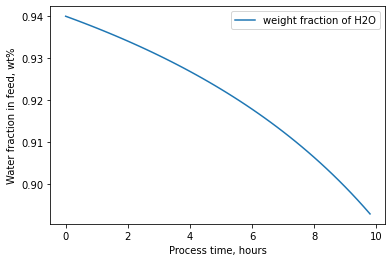

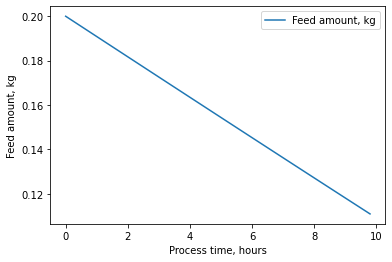

In [33]:
# Example 9. Creation of a ProcessModel object; 
# modelling isothermal ideal process of H2O/EtOH mixture separation 
# with a Romakon PM 102 membrane 

from pyvaporation import Membrane, Mixtures, Pervaporation, Conditions

romakon_pm_102 = Membrane.load("tests/default_membranes/RomakonPM_102")

h2o_etoh = Mixtures.H2O_EtOH

pervaporation = Pervaporation(membrane=romakon_pm_102, mixture=h2o_etoh)

conditions = Conditions(
    membrane_area=0.0048,
    initial_feed_temperature=335.15,
    initial_feed_amount=0.200,
    initial_feed_composition=Composition(p=0.94, type=CompositionType.weight)
)

model = pervaporation.ideal_isothermal_process(
    number_of_steps=50,
    delta_hours=0.2,
    conditions=conditions,
)

model.plot(model.feed_compositions, 'Water fraction in feed, wt%')
model.plot(model.feed_mass, 'Feed amount, kg')

In [35]:
# Example 10. Illustration of the influence of the precision value 
# on the obtained flux values 

from pyvaporation import (
    Membrane,
    IdealExperiment,
    IdealExperiments,
    Pervaporation
)

experiment_meoh_1 = IdealExperiment(
    name="PAI_SPI_1(wt%)_asym",
    temperature=293.15,
    component=Components.MeOH,
    permeance=Permeance(0.0267),
    activation_energy=20904.65064,
)

experiment_meoh_2 = IdealExperiment(
    name="PAI_SPI_1(wt%)_asym",
    temperature=313.15,
    component=Components.MeOH,
    permeance=Permeance(0.04498),
    activation_energy=20904.65064,
)

experiment_mtbe_1 = IdealExperiment(
    name="PAI_SPI_1(wt%)_asym",
    temperature=293.15,
    component=Components.MTBE,
    permeance=Permeance(0.01077),
    activation_energy=-39656.76576,
)

experiment_mtbe_2 = IdealExperiment(
    name="PAI_SPI_1(wt%)_asym",
    temperature=313.15,
    component=Components.MTBE,
    permeance=Permeance(0.00425),
    activation_energy=-39656.76576,
)

ideal_experiments = IdealExperiments(
    experiments=[
        experiment_meoh_1,
        experiment_meoh_2,
        experiment_mtbe_1,
        experiment_mtbe_2,
    ]
)

pai_spi = Membrane(ideal_experiments=ideal_experiments, name="PAI_SPI_1(wt%)_asym")
meoh_mtbe = Mixtures.MeOH_MTBE

pervaporation = Pervaporation(membrane=pai_spi, mixture=meoh_mtbe)

precision = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
composition = Composition(p=0.1, type=CompositionType.weight)

print('Partial fluxes')
for p in precision:
    print(
       pervaporation.calculate_partial_fluxes(
           feed_temperature=313.15,
           composition=composition,
           permeate_temperature=293.15,
           precision=p
       )
    )


Partial fluxes
(0.25079337140976277, 0.1637411760363952)
(0.255980578053858, 0.16142891854790636)
(0.255786119219273, 0.16151387957176908)
(0.2557618303846792, 0.16152450094117343)
(0.2557587951348898, 0.16152582838440846)


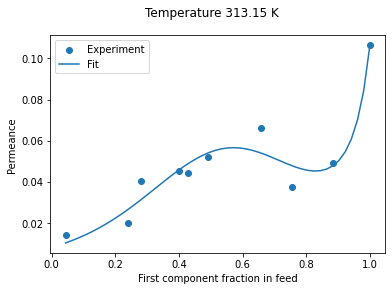

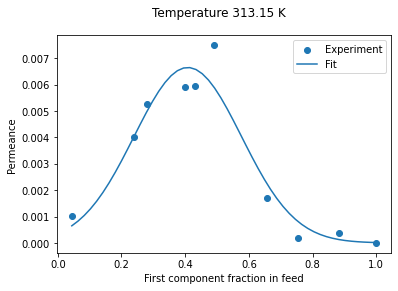

In [36]:
# Example 11. Example of fitting experimental data with find_best_fit() function

from pyvaporation import (
    DiffusionCurve, Mixtures, Composition, 
    CompositionType, Measurements, find_best_fit
)

compositions = [
    0.9999,
    0.883,
    0.756,
    0.658,
    0.490,
    0.430,
    0.401,
    0.280,
    0.240,
    0.044,
]

flux_h2o_40 = [
    0.7848,
    0.3480,
    0.2566,
    0.4406,
    0.3340,
    0.2773,
    0.2816,
    0.2292,
    0.1066,
    0.0247,
]

flux_etoh_40 = [
    0,
    0.0017,
    0.0013,
    0.0136,
    0.0684,
    0.0568,
    0.0577,
    0.0573,
    0.0457,
    0.0165,
]

spi_diffusion_curve = DiffusionCurve(
   mixture=Mixtures.H2O_EtOH,
   membrane_name="SPI dense",
   feed_temperature=313.15,
   feed_compositions=[
       Composition(p=c, type=CompositionType.weight) for c in compositions
   ],
   partial_fluxes=[
       (flux_h2o_40[i], flux_etoh_40[i]) for i in range(len(compositions))
   ],
)

measurements_h2o = Measurements.from_diffusion_curve_first(spi_diffusion_curve)
measurements_etoh = Measurements.from_diffusion_curve_second(spi_diffusion_curve)

fit_h2o = find_best_fit(measurements_h2o, n=9)
fit_etoh = find_best_fit(measurements_etoh)

fit_h2o = find_best_fit(measurements_h2o, n=9)
fit_etoh = find_best_fit(measurements_etoh)

fit_h2o.plot(measurements_h2o, temperature=313.15)
fit_etoh.plot(measurements_etoh, temperature=313.15)

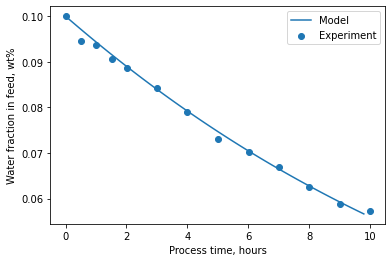

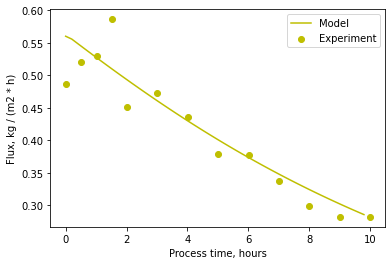

In [37]:
# Example 12. Modelling of a non-ideal isothermal process
# described in the literature using the membrane performance data 
# provided in an independent source

from pyvaporation import Membrane, Mixtures, Pervaporation, Conditions

membrane = Membrane.load("tests/default_membranes/Pervap_4101")

pv = Pervaporation(
    membrane=membrane,
    mixture=Mixtures.H2O_EtOH,
)

con = Conditions(
    membrane_area=0.017,
    initial_feed_temperature=368.15,
    initial_feed_amount=1.5,
    initial_feed_composition=Composition(p=0.1, type=CompositionType.weight),
    permeate_pressure=0,
)

model = pv.non_ideal_isothermal_process(
    conditions=con,
    diffusion_curve_set=membrane.diffusion_curve_sets[0],
    initial_permeances=(
       Permeance(0.0153),
       Permeance(0.00000632),
    ),
    number_of_steps=50,
    delta_hours=0.2,
)

experiment_time_hours = [
    0,
    0.5163,
    1.0148,
    1.5133,
    2.0118,
    3.0087,
    4.0057,
    5.0173,
    6.0143,
    7.0112,
    8.0082,
    9.0052,
    10,
]

experiment_water_fraction = [
    0.1,
    0.0946,
    0.0938,
    0.0907,
    0.0887,
    0.0842,
    0.0791,
    0.0730,
    0.0702,
    0.0669,
    0.0625,
    0.0588,
    0.0573,
]

experiment_water_flux = [
    0.4863,
    0.5209,
    0.5301,
    0.5865,
    0.4517,
    0.4736,
    0.4353,
    0.3789,
    0.3770,
    0.3370,
    0.2987,
    0.2823,
    0.2823,
]

fig1, ax = plt.subplots()
ax.plot(
    model.time,
    [c.first for c in model.feed_compositions], 
    label="Model",
)

ax.scatter(
    experiment_time_hours,
    experiment_water_fraction,
    label="Experiment",
)

ax.set_xlabel("Process time, hours")
ax.set_ylabel("Water fraction in feed, wt%")
ax.legend()

plt.show()

fig2, ax = plt.subplots()
ax.plot(
    model.time,
    [f[0] for f in model.partial_fluxes], 
    label="Model", 
    color="y"
)

ax.scatter(
    experiment_time_hours,
    experiment_water_flux,
    label="Experiment",
    color="y"
)

ax.set_xlabel("Process time, hours")
ax.set_ylabel("Flux, kg / (m2 * h)")
ax.legend()

plt.show()

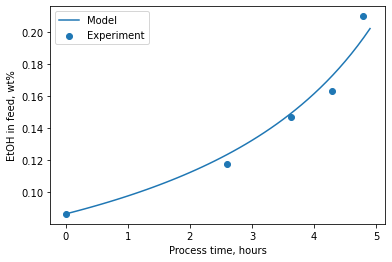

In [38]:
# Example 13. Modelling a non-ideal isothermal process of 
# water/ethanol mixture concentration with Romakon-PM 102 membranes

from pyvaporation import Membrane, Mixtures, Pervaporation, Conditions

membrane = Membrane.load("tests/default_membranes/RomakonPM_102")

pv = Pervaporation(
    membrane=membrane,
    mixture=Mixtures.H2O_EtOH,
)

initial_composition = Composition(p=0.9134, type=CompositionType.weight)

conditions = Conditions(
    membrane_area=2.55e-3,
    initial_feed_temperature=341.95,
    initial_feed_amount=0.06,
    initial_feed_composition=initial_composition,
    permeate_pressure=1,
)

model = pv.non_ideal_isothermal_process(
    conditions=conditions,
    diffusion_curve_set=membrane.diffusion_curve_sets[0],
    number_of_steps=50,
    delta_hours=0.1,
)

exp_time = [
    0,
    2.60,
    3.62,
    4.28,
    4.78,
]
exp_fraction = [0.0866, 0.1176, 0.1472, 0.1630, 0.2098]

fig4, ax = plt.subplots()
ax.plot(
    model.time,
    [c.second for c in model.feed_compositions], 
    label="Model",
)

ax.scatter(
    exp_time,
    exp_fraction,
    label="Experiment",
)

ax.set_xlabel("Process time, hours")
ax.set_ylabel("EtOH in feed, wt%")
ax.legend()

plt.show()

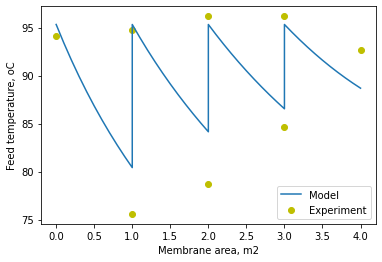

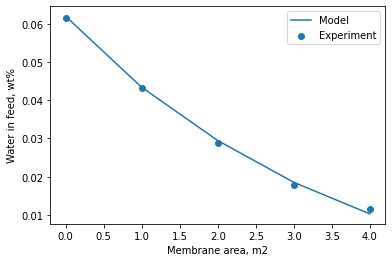

In [39]:
# Example 14. Modelling of a non-ideal non-isothermal process
# described in the literature

from pyvaporation import Membrane, Mixtures, Pervaporation, Conditions

membrane = Membrane.load("tests/default_membranes/Chang_et_al_1998")

pv = Pervaporation(
    membrane=membrane,
    mixture=Mixtures.H2O_EtOH,
)

model_temp = []
model_area = []
model_fraction = [0.062]
for i in range(4):
    conditions = Conditions(
        membrane_area=1,
        initial_feed_temperature=368.475,
        initial_feed_amount=12.106,
        initial_feed_composition=Composition(p=model_fraction[i], type=CompositionType.weight),
        permeate_pressure=1.3,
    )

    model = pv.non_ideal_non_isothermal_process(
        conditions=conditions,
        diffusion_curve_set=membrane.diffusion_curve_sets[0],
        number_of_steps=11,
        delta_hours=0.1,
    )
    area=[t+i for t in model.time]
    model_temp.extend(model.feed_temperature)
    model_area.extend(area)
    model_fraction.append(model.feed_compositions[-1].first)


exp_area_initial_temp=[0,1,2,3]
exp_initial_temp=[94.09241735, 94.76834214,96.18163942,96.18163942]

exp_area_ret_temp=[1,2,3,4]
exp_ret_temp=[75.59665724, 78.66904264, 84.62947032, 92.67912007]

exp_area_fraction=[0,1,2,3,4]
exp_fraction=[
    0.06162740899,
    0.04331905782,
    0.02886509636,
    0.01794432548,
    0.01141327623,
]

fig41, ax = plt.subplots()
ax.plot(
    model_area,
    [(t-273.15) for t in model_temp], 
    label="Model"
)

ax.scatter(
    exp_area_initial_temp,
    exp_initial_temp,
    label="Experiment",
    color="y",
)

ax.scatter(
    exp_area_ret_temp,
    exp_ret_temp,
    color="y",
)

ax.set_xlabel("Membrane area, m2")
ax.set_ylabel("Feed temperature, oC")
ax.legend()

plt.show()

fig42, ax = plt.subplots()
ax.plot(
    exp_area_fraction,
    model_fraction, label="Model"
)

ax.scatter(
    exp_area_fraction,
    exp_fraction,
    label="Experiment"
)

ax.set_xlabel("Membrane area, m2")
ax.set_ylabel("Water in feed, wt%")
ax.legend()

plt.show()